In [2]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile
import csv

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

In [2]:
df = pd.read_csv('E:/Content Analysis/comments_negative.csv')
df

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality
0,c0a2d2p,t1_c0a2cn1,t5_1a8ah,t3_8pr4w,"Na, not really. \n\nI just hate islam and ever...",-2946,-2946,b34nz,0,t3_8pr4w,What goes through the heads of you people? Is...,459,459,[deleted],0
1,c6okok8,t1_c6oaywb,t5_2s8e9,t3_11otij,lol you're some ugly ass white dude,-2724,-2724,letmetellyouhowitis,0,t3_11otij,This is worth noting.\n\nThankfully I don't.,72,72,flowen65,0
2,c3nlalf,t1_c3nijr7,t5_2qzb6,t3_p9a1v,"First of off, its not true, and second off, I ...",-2132,-2132,iamwoodyharrelson,0,t3_p9a1v,I swear this is *(allegedly)* a true story. I...,4028,4028,AndyRooney,0
3,c10nh8q,t1_c10nc34,t5_6,t3_djasj,Who made you reddit police? I will submit what...,-2117,-2117,JimmyJamesincorp,0,t3_djasj,I was on my way over here to bitch and moan ab...,1214,1214,SloaneRanger,0
4,c3nlufk,t1_c3nlcob,t5_2qzb6,t3_p9a1v,We gotta be...i consider my time valuable.,-1962,-1962,iamwoodyharrelson,0,t3_p9a1v,Should change this AMA to AMAAR (Ask Me Anythi...,1405,1405,bersh,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,c0fycb3,t1_c0fxzh8,t5_2qh13,t3_a5euo,"""*THIS IS LIKE PRESIDENT OBAMA SAYING HE'S WOR...",-6,-6,scientologist2,0,t3_a5euo,Even the Prime Minister Kevin Rudd is [concern...,77,77,mrpostal,0
1999996,c65ga5p,t1_c65g7m7,t5_2qh68,t3_zksqa,No. Privilege is bunk. \n\nThis is strictly fo...,-6,-6,[deleted],0,t3_zksqa,So you believe in privilege when it affects yo...,3,3,[deleted],0
1999997,c4nmzah,t1_c4nmz26,t5_2qo4s,t3_tl7k0,how original,-6,-6,mcdvda,0,t3_tl7k0,Cue comments about Miami fans leaving,2,2,pepito420,0
1999998,c1fqczr,t1_c1fq37p,t5_2qh61,t3_fg98s,Don't just go spewing things like this w/o sou...,-6,-6,BloodyFreeze,0,t3_fg98s,The chief torturer of CIA is now Vice Presiden...,67,67,[deleted],0


In [20]:
df = df[:500]
neg_comment = ' '.join(df['text'])
len(neg_comment)

130757

In [11]:
nlp = spacy.load('en')
def word_tokenize(word_list):
    tokenized = []
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [22]:
neg_tokens = word_tokenize(neg_comment)
neg_tokens[:10]

['Na',
 'not',
 'really',
 'I',
 'just',
 'hate',
 'islam',
 'and',
 'everything',
 'it']

In [23]:
import nltk

In [24]:
neg_text = nltk.Text(neg_tokens)
neg_index = nltk.text.ConcordanceIndex(neg_text) 
neg_index.print_concordance('hate')

Displaying 18 of 18 matches:
Na not really I just hate islam and everything it stands for I 
ovement in world hunger slavery abuse hate HIV cancer bla bla bla etc admit it y
yone who 's honest gets showered with hate Fuck all you downvoters Keep em comin
pple is a good company and PC sucks I hate you I fucked your mother I took an ar
 them Being an adult is hard Really I hate you on tv you are so annoying visuall
 shame also i loled You are making me hate reddit Fuck off Being a white male Am
 It sounds really really stupid and I hate it Like he is an ape who needs to get
out there feels such genuine seething hate for me I 'd share your post with my a
g faggot Did n't ask Exactly And I 'd hate to be shamed in this internet courtho
of their lack of faith a shitstorm of hate and vitriol is slung at them Some of 
ginals gems like this one Holy shit I hate the reddit patting of the back on a g
includes everything Edit Wow a lot of hate on this forum I apologize and I 'm no
effective I know

In [25]:
neg_text.common_contexts(['hate'])

just_islam abuse_hiv with_fuck i_you me_reddit i_it seething_for 'd_to
of_and i_the of_on to_on everyone_arrow you_muslims who_men i_this
na_console


In [26]:
neg_text.count('hate')

18

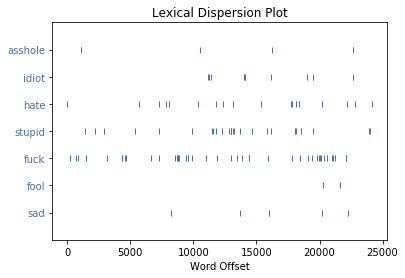

In [31]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
neg_text.dispersion_plot(['asshole','idiot', 'hate', 'stupid' ,'fuck', 'fool', 'sad'])
sns.set() #Re-enabling seaborn

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

In [33]:
counts_dict = {}
for word in neg_tokens:
    if word in counts_dict:
        counts_dict[word] += 1
    else:
        counts_dict[word] = 1
word_counts = sorted(counts_dict.items(), key=lambda x: x[1], reverse=True)
word_counts[:20]

[('the', 734),
 ('I', 676),
 ('to', 610),
 ('a', 562),
 ('you', 463),
 ('and', 441),
 ('of', 368),
 ('is', 356),
 ('it', 326),
 ('that', 302),
 ("n't", 240),
 ("'s", 240),
 ('in', 219),
 ('this', 208),
 ('for', 203),
 ('do', 169),
 ('on', 167),
 ('not', 162),
 ('are', 159),
 ('was', 146)]

In [38]:
stop_words_freq = []
for i, element in enumerate(word_counts):
    if i >= 29:
        break
    else:
        stop_words_freq.append(element[0])
stop_words_freq

['the',
 'I',
 'to',
 'a',
 'you',
 'and',
 'of',
 'is',
 'it',
 'that',
 "n't",
 "'s",
 'in',
 'this',
 'for',
 'do',
 'on',
 'not',
 'are',
 'was',
 'me',
 'with',
 'have',
 'my',
 'be',
 'but',
 'like',
 'just',
 'your']

In [39]:
def normalize_tokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [77]:
df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(x))
df['normalized_tokens'] = df['tokenized_text'].apply(lambda x: normalize_tokens(x, stop_words_freq))
df['normalized_tokens_count'] = df['normalized_tokens'].apply(lambda x: len(x))

df

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality,tokenized_text,normalized_tokens,normalized_tokens_count,normalized_tokens_POS
0,c0a2d2p,t1_c0a2cn1,t5_1a8ah,t3_8pr4w,"Na, not really. \n\nI just hate islam and ever...",-2946,-2946,b34nz,0,t3_8pr4w,What goes through the heads of you people? Is...,459,459,[deleted],0,"[Na, not, really, I, just, hate, islam, and, e...","[na, hate, islam, stand, want, share, street, ...",90,"[(na, IN), (,, ,), (not, RB), (really, RB), (...."
1,c6okok8,t1_c6oaywb,t5_2s8e9,t3_11otij,lol you're some ugly ass white dude,-2724,-2724,letmetellyouhowitis,0,t3_11otij,This is worth noting.\n\nThankfully I don't.,72,72,flowen65,0,"[lol, you, 're, some, ugly, ass, white, dude]","[lol, ugly, ass, white, dude]",5,"[(lol, UH), (you, PRP), ('re, VBP), (some, DT)..."
2,c3nlalf,t1_c3nijr7,t5_2qzb6,t3_p9a1v,"First of off, its not true, and second off, I ...",-2132,-2132,iamwoodyharrelson,0,t3_p9a1v,I swear this is *(allegedly)* a true story. I...,4028,4028,AndyRooney,0,"[First, of, off, its, not, true, and, second, ...","[true, second, want, answer, question, let, fo...",9,"[(first, RB), (of, IN), (off, RB), (,, ,), (it..."
3,c10nh8q,t1_c10nc34,t5_6,t3_djasj,Who made you reddit police? I will submit what...,-2117,-2117,JimmyJamesincorp,0,t3_djasj,I was on my way over here to bitch and moan ab...,1214,1214,SloaneRanger,0,"[Who, made, you, reddit, police, I, will, subm...","[reddit, police, submit, want]",4,"[(who, WP), (made, VBD), (you, PRP), (reddit, ..."
4,c3nlufk,t1_c3nlcob,t5_2qzb6,t3_p9a1v,We gotta be...i consider my time valuable.,-1962,-1962,iamwoodyharrelson,0,t3_p9a1v,Should change this AMA to AMAAR (Ask Me Anythi...,1405,1405,bersh,0,"[We, got, ta, be, i, consider, my, time, valua...","[get, ta, consider, time, valuable]",5,"[(we, PRP), (got, VBD), (ta, TO), (be, VB), (...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,c4jxxm7,t1_c4jwyr3,t5_2qh03,t3_t5zt1,I used to show up again after any math/challe...,-305,-305,arrowstotheknee,0,t3_t5zt1,It shows up again after any match/challenge.,62,62,mywowtoonnname,0,"[I, used, to, show, up, again, after, any, mat...","[math, challenge, take, arrow, knee]",5,"[(i, PRP), ( , _SP), (used, VBD), (to, TO), (s..."
496,c6r9okg,t1_c6r4npw,t5_2sokd,t3_1203f7,"Fuck, you're retarded.\n\nDon't you learn this...",-305,-305,RationalistTidder,0,t3_1203f7,Jesus christ my mind is blown fuck.,1076,1076,Large_Pimpin,0,"[Fuck, you, 're, retarded, Do, n't, you, learn...","[fuck, retard, learn, shit, fuck, 3rd, grade]",7,"[(fuck, NNP), (,, ,), (you, PRP), ('re, VBP), ..."
497,cnlczbo,t1_cnl8rno,t5_2qh03,t3_2s1a23,"16 seater? pft, PC will have something that ho...",-304,-304,iffy9096,0,t3_2s1a23,Get 16 seater FIB plane and turn everyone on t...,407,407,NonKarmaAccount,0,"[16, seater, pft, PC, will, have, something, t...","[seater, pft, pc, hold, +, player, edit, conso...",38,"[(16, CD), (seater, NNP), (?, .), (pft, NNS), ..."
498,c4nlkrx,t1_c4nlf27,t5_2qore,t3_tlcrh,"There is already a bot that does this, karma w...",-304,-304,TRiPgod,0,t3_tlcrh,If people have problems accessing twitter he s...,48,48,KaneHart,0,"[There, is, already, a, bot, that, does, this,...","[bot, karma, whore]",3,"[(there, EX), (is, VBZ), (already, RB), (a, DT..."


In [78]:
cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in df['normalized_tokens'].sum()))
print(cfdist.N())

10077


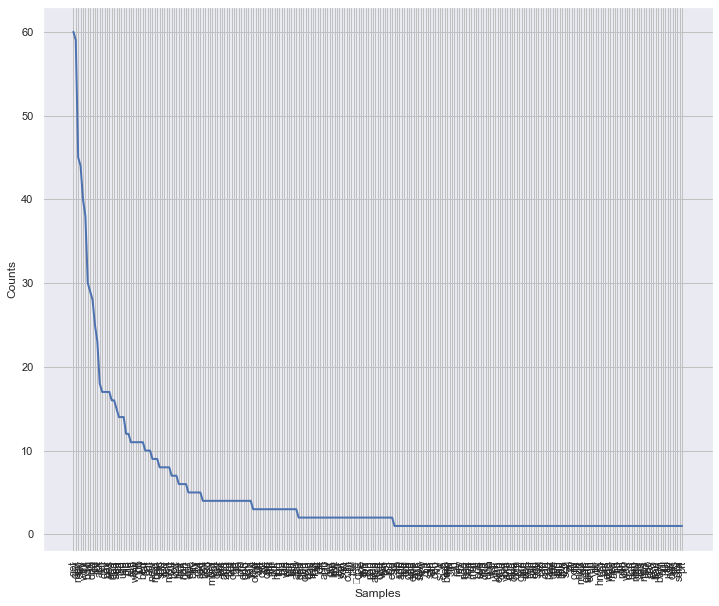

In [79]:
plt.figure(figsize=(12, 10))
cfdist[3].plot()

In [80]:
cpdist = nltk.ConditionalProbDist(cfdist, nltk.ELEProbDist)

print(cpdist[5].max())

print(cpdist[5].prob(cpdist[5].max()))

think
0.047435897435897434


In [81]:
print(cpdist[8].max())

print(cpdist[8].prob(cpdist[8].max()))

downvote
0.10375146541617819


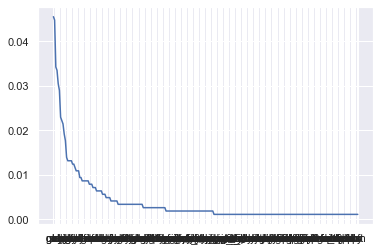

In [82]:
cp_dict = {}
for i in cfdist[3]:
    cp_dict[i] = cpdist[3].prob(i)
cp_list = sorted(cp_dict.items(), key=lambda x: x[1], reverse=True)
x, y = zip(*cp_list)

plt.plot(x, y)
plt.show()

In [83]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags
df['normalized_tokens_POS'] = [spacy_pos(t) for t in df['text']]

In [96]:
import re
cfdist_WordtoPOS = nltk.ConditionalFreqDist(df['normalized_tokens_POS'].sum())
list(cfdist_WordtoPOS.items())[30:40]

[('with', FreqDist({'IN': 138})),
 ('muslims', FreqDist({'NNPS': 2})),
 ('they', FreqDist({'PRP': 105})),
 ('are', FreqDist({'VBP': 170})),
 ('beneath', FreqDist({'IN': 1})),
 ('me', FreqDist({'PRP': 144})),
 ('deserve', FreqDist({'VB': 4, 'VBP': 1})),
 ('inhabit', FreqDist({'VB': 1})),
 ('country', FreqDist({'NN': 8})),
 ('am', FreqDist({'VBP': 39}))]

In [97]:
cfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in df['normalized_tokens_POS'].sum())
cfdist_POStoWord['JJ']

FreqDist({'funny': 36, 'good': 36, 'stupid': 29, 'other': 24, 'fucking': 24, 'bad': 23, 'real': 22, 'many': 19, 'right': 19, 'own': 18, ...})

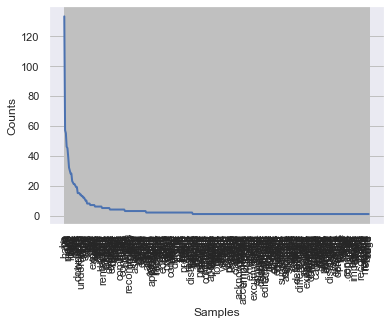

In [98]:
cfdist_POStoWord['VB'].plot()

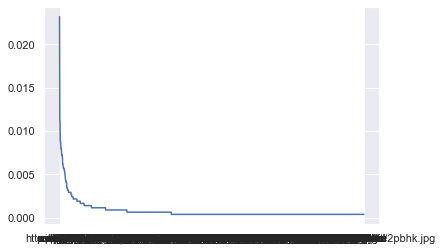

In [102]:
cpdist_POStoWord = nltk.ConditionalProbDist(cfdist_POStoWord, nltk.ELEProbDist)
cp_dict_POS = {}
for i in cfdist_POStoWord['NN']:
    cp_dict_POS[i] = cpdist_POStoWord['NN'].prob(i)
cp_list_POS = sorted(cp_dict_POS.items(), key=lambda x: x[1], reverse=True)
x1, y1 = zip(*cp_list_POS)

plt.plot(x1, y1)
plt.show()

(-0.5, 499.5, 499.5, -0.5)

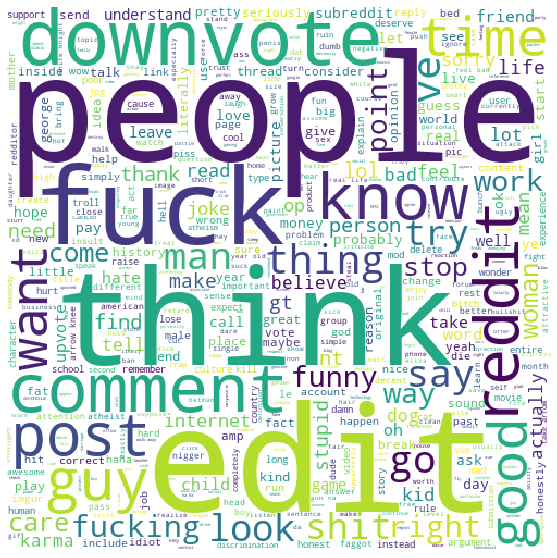

In [104]:
plt.figure(figsize=(12, 10))
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
#plt.savefig("neg_word_cloud.pdf", format = 'pdf')

According to the above analyses, I find that words like <i>think</i>, <i>know</i>, <i>downvote</i>, <i>want</i>, etc. are more frequent than others, which, as far as I am concerned, is due to the fact that when people use these words, they are likely to express their opinions and share their information with others, which can elicit negative responses. In brief, comments in reddit which express ideas have a higher possibility of getting a lot of downvotes. 

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?

In [107]:
def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

In [108]:
df['sentences'] = df['text'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])

In [110]:
def tag_sents_pos(sentences):
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [111]:
df['POS_sents'] = df['sentences'].apply(lambda x: tag_sents_pos(x))
df['POS_sents']

0      [[(Na, RB), (not, RB), (really, RB), (I, PRP),...
1      [[(lol, UH), (you, PRP), ('re, VBP), (some, DT...
2      [[(First, RB), (of, IN), (off, RB), (its, PRP$...
3      [[(Who, WP), (made, VBD), (you, PRP), (reddit,...
4      [[(We, PRP), (got, VBD), (ta, TO), (be, VB)], ...
                             ...                        
495    [[(I, PRP), (used, VBD), (to, TO), (show, VB),...
496    [[(Fuck, UH)], [(you, PRP), ('re, VBP), (retar...
497    [[(16, CD), (seater, NNP), (pft, NNP), (PC, NN...
498    [[(There, EX), (is, VBZ), (already, RB), (a, D...
499    [[(You, PRP), (sound, VBP), (like, IN), (a, DT...
Name: POS_sents, Length: 500, dtype: object

In [113]:
countTarget = 'NN'
targetCounts = {}
for entry in df['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[1:20]

[('comment', 43),
 ('time', 40),
 ('way', 34),
 ('shit', 34),
 ('person', 31),
 ('life', 30),
 ('thing', 28),
 ('someone', 28),
 ('something', 26),
 ('post', 26),
 ('everyone', 25),
 ('man', 25),
 ('internet', 22),
 ('joke', 22),
 ('lot', 22),
 ('one', 21),
 ('nothing', 21),
 ('fuck', 21),
 ('reddit', 21)]

In [114]:
NTarget = 'JJ'
Word = 'life'
NResults = set()
for entry in df['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)  

{'good', 'real'}


The result is actually very interesting considering that this corpus is about negative comments (having many downvotes) on Reddit, but when talking about "life" in those comments, the associated adjectives are quite positive, like "good" and "real", which, to my surprise, may reflect Internet user's rejections of positive sides of the world in some cases.

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 

In [115]:
negBigrams = nltk.collocations.BigramCollocationFinder.from_words(df['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(negBigrams.N))

There are 10077 bigrams in the finder


In [116]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
negBigrams.score_ngrams(bigram_measures.student_t)[:40]

[(('m', 'sorry'), 2.90979458172075),
 (('m', 'go'), 2.6583341568394525),
 (('arrow', 'knee'), 2.6430507610936997),
 (('take', 'arrow'), 2.636636954912835),
 (('gon', 'na'), 2.4477882018285806),
 (('white', 'knight'), 2.446572815432439),
 (('year', 'old'), 2.438146136419193),
 (('real', 'life'), 2.415458923691222),
 (('feel', 'bad'), 2.4130281508989393),
 (('ha', 'ha'), 2.233227680773383),
 (('walk', 'away'), 2.229144754229174),
 (('edit', 'downvote'), 2.0608901990569333),
 (('dog', 'park'), 1.9916641857695743),
 (('god', 'damn'), 1.9896794680956633),
 (('op', 'brother'), 1.9884886374913169),
 (('delete', 'post'), 1.9727597499255731),
 (('group', 'people'), 1.9543514935000497),
 (('edit', 'guy'), 1.9506625361322965),
 (('guy', 'stop'), 1.894611491515332),
 (('good', 'thing'), 1.873474248288181),
 (('think', 'funny'), 1.8356653766001787),
 (('edit', 'fuck'), 1.8007037449053083),
 (('get', 'downvote'), 1.738017267043763),
 (('thursday', '4th'), 1.7315351627913933),
 (('jim', 'morrison'), 

In [117]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
negTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(df['normalized_tokens'].sum())
negTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('take', 'arrow', 'knee'), 2.4494819272588684),
 (('ha', 'ha', 'ha'), 1.73204789653797),
 (('jerry', 'elaine', 'kramer'), 1.4142135066657484),
 (('science](http://www.amazon.com', 'gp', 'product/0136020070?ie'),
  1.4142135066657484),
 (('earth', 'science](http://www.amazon.com', 'gp'), 1.4142134788120753),
 (('relate', 'earth', 'science](http://www.amazon.com'), 1.4142133534705457),
 (('gp', 'product/0136020070?ie', '='), 1.4142133116900357),
 (('polidebanews-20&amp;linkcode',
   '=',
   'xm2&amp;camp=1789&amp;creativeasin=0136020070'),
  1.4142133116900357),
 (('product/0136020070?ie', '=', 'utf8&amp;tag'), 1.4142133116900357),
 (('sexy', 'public', 'flashing'), 1.4142133116900357),
 (('utf8&amp;tag', '=', 'polidebanews-20&amp;linkcode'), 1.4142133116900357),
 (('http://www.reddit.com/wiki/reddiquette',
   'http://www.reddit.com/wiki/reddiquette',
   'http://www.reddit.com/wiki/reddiquette'),
  1.414213116714323),
 (('jim', 'morrison', 'stand'), 1.4142130610069767),
 (('outright', '

In [118]:
Ngrams = nltk.ngrams(df['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('jay', 'wilson', 'say', 'facebook'): 2, ('nt', 'know', 'shit', 'batman'): 2, ('take', 'arrow', 'knee', 'fuck'): 2, ('relate', 'earth', 'science](http://www.amazon.com', 'gp'): 2, ('earth', 'science](http://www.amazon.com', 'gp', 'product/0136020070?ie'): 2, ('science](http://www.amazon.com', 'gp', 'product/0136020070?ie', '='): 2, ('gp', 'product/0136020070?ie', '=', 'utf8&amp;tag'): 2, ('product/0136020070?ie', '=', 'utf8&amp;tag', '='): 2, ('=', 'utf8&amp;tag', '=', 'polidebanews-20&amp;linkcode'): 2, ('utf8&amp;tag', '=', 'polidebanews-20&amp;linkcode', '='): 2, ('=', 'polidebanews-20&amp;linkcode', '=', 'xm2&amp;camp=1789&amp;creativeasin=0136020070'): 2, ('way', 'm', 'call', 'troll'): 2, ('edit', 'okay', 'm', 'sorry'): 2}


In [120]:
for i in negBigrams.score_ngrams(bigram_measures.student_t):
    if 'feel' in i[0]:
        print(i)

(('feel', 'bad'), 2.4130281508989393)
(('feel', 'sympathy'), 1.4100033403952055)
(('feel', 'need'), 1.3552704546826413)
(('feel', 'm'), 1.2015973524896735)
(('feel', 'astronaut'), 0.9970229234891337)
(('feel', 'option'), 0.9970229234891337)
(('feel', 'slight'), 0.9970229234891337)
(('feel', 'urge'), 0.9970229234891337)
(('mods', 'feel'), 0.9970229234891337)
(('partner', 'feel'), 0.9970229234891337)
(('twat', 'feel'), 0.9970229234891337)
(('feel', 'basically'), 0.9940458469782674)
(('feel', 'necessary'), 0.9940458469782674)
(('feel', 'worthy'), 0.9940458469782674)
(('pain', 'feel'), 0.9940458469782674)
(('sight', 'feel'), 0.991068770467401)
(('feel', 'genuine'), 0.9880916939565347)
(('rape', 'feel'), 0.9880916939565347)
(('fly', 'feel'), 0.9851146174456683)
(('dick', 'feel'), 0.982137540934802)
(('face', 'feel'), 0.982137540934802)
(('feel', 'fair'), 0.982137540934802)
(('feel', 'free'), 0.982137540934802)
(('feel', 'wake'), 0.982137540934802)
(('suppose', 'feel'), 0.982137540934802)
((

One thing I am interested in about the bigrams in my corpus is that "take", "arrow", and "knee" always appear together, and according to the t-value, it seems that there exists some relationship between these three words. I search the Internet and find that there is actually a meme from a popular computer game, "I used to xxx, until I took an arrow in the knee." I think this bigram suggests that many reddit users are also computer game players or at least they are willing to accept this kind of culture.

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

In [121]:
def tag_sents_ner(sentences):
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents


df['classified_sents'] = df['sentences'].apply(lambda x: tag_sents_ner(x))## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

In [122]:
df['classified_sents']

0      [[(muslims, NORP)], [], [], [], [], [], [], []...
1                                                   [[]]
2      [[(First, ORDINAL), (second, ORDINAL)], [(Lets...
3                                               [[], []]
4                                               [[], []]
                             ...                        
495                                             [[], []]
496                           [[], [], [(3rd, ORDINAL)]]
497    [[(16, CARDINAL), (30, CARDINAL)], [(2, CARDIN...
498                                                 [[]]
499                                                 [[]]
Name: classified_sents, Length: 500, dtype: object

In [123]:
entityCounts = {}
for entry in df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('one', 23),
 ('first', 17),
 ('2', 13),
 ('May 2032', 12),
 ('George', 12),
 ('OP', 10),
 ('3', 8),
 ('two', 7),
 ('ELIZA', 6),
 ('American', 5)]

In [126]:
[x[0] for x in sortedEntities if x[1] == 2]

['five',
 'Jay Wilson',
 'EPA',
 'yesterday',
 'Dude',
 'Oren',
 'YOLO',
 'four',
 'Tuesday',
 'George Costanza',
 'Jerry Elaine',
 'Kramer',
 'New York',
 '16',
 '5 years',
 'half',
 '101',
 'xanax',
 '4chan',
 'Earth',
 'America',
 'Hotmail',
 'haha',
 'Americans',
 'ONE',
 'doe',
 'million',
 'today',
 'Edit 2',
 'Sovngarde',
 'at least one',
 'Philadelphia',
 'Demarco Edit',
 'Admins',
 'Christian',
 'English',
 '8th',
 'TSA',
 '30',
 'Next',
 'SRD',
 'Canadian',
 'Better Call Saul',
 'Weizenbaum',
 '22',
 'yeh']

In [127]:
nonObjCounts = {}
for entry in df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:10]

[('one', 23),
 ('first', 17),
 ('2', 13),
 ('May 2032', 12),
 ('George', 12),
 ('3', 8),
 ('two', 7),
 ('American', 5),
 ('second', 4),
 ('100', 4)]

In [128]:
OrgCounts = {}
for entry in df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                print(ent)

Lets
Oatmeal
Google
sci
EPA
EPA
OP
RPG
PG13
SPITE
nice spelling douche
Analyze
Divorce
knee!](http://twistedsifter.sifter.netdna
YOLO
Blink
Congratulations Slut
social mobility
Apple
Riddler
/r
Hint
Karma
OP
joe_archer
Time
/r
YOLO OP 'S
gt;it
The Luftwaffe
white knights
Everything 's
Edit -125 Y'all
Amazon
Gotchya
Apple
Nope
gt;That
NEUTRAL
FTFY
SHAME
Edit GODDAMMIT Edit 2
Narcissists
wat
UI
Sweep Hotmail Active Views
IMAP
Pokemon
OP
cal**LE**d
THE ASS NIGGER
Edit Jeez
Yahoo
Apple
EDIT
gt;How dare someone
navy
MOTORCYCLE BOY CERTAINLY
PoorLogic
mcdonalds
doe
taliban
gt;Or
gt;as
DRM
TL;DR
OP
OP
OP
/u xisytenin
OP
Murray
Edit Edit
li(nk)[http://www.youtube.com
Nintendo
Pretty
Thor
xkcd
un
Obama
OP
LOL DOWNVOTE ME
LOL OP
u
mcdonald
le
Paint
ERLERGERNT MAHTHERMAHTERCS ERERNT
TSA
TSA
YOLO
Next
/r
/r
SRS
SRD
SRD
CS
OP
OP
WHat
Luckily
Next
GTFO
MRW
Better Call Saul
Woof](http://i.imgur.com/51oBhlo.gif Intelligence
DarqWolff
Navy
the Navy Seals
Wikipedia
ELIZA
ELIZA
Weizenbaum
ELIZA
ELIZA
Wei

In [135]:
OrgCounts = {}
for entry in df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'GPE':
                print(ent)

California
the United States
USA
Oren
Santorum
france
toronto
New York
Jersey
Diablo
Oren
http://www.reddit.com/r/pics/comments/fl59q/reddit_look_what_my_wife_made_me_for_valentines/
xanax
Florida
Denoting
Triachus
Canada
kinda
Catelyn
Neds
Libya
America
West Zealand
PROVIDE
Incognito
France
Sovngarde
Sovngarde
Philadelphia
Neymar
America
vitriol
US
us
Philadelphia
New York
Ar Ramadi
Paktika


In [136]:
OrgCounts = {}
for entry in df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'NORP':
                print(ent)

muslims
Mexicans
Atheist
American
Tagaryean
Iranian
Iranian
Iranian
Imperialist
Hotmail
Sink
American
Americans
American
Americans
American
American
Buncha
Christian
Christian
mans
German
Socialist
Muslims
Muslim
americans
Canadian
C'mon
Canadian
Rogerian
christian


In [137]:
OrgCounts = {}
for entry in df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'PERSON':
                print(ent)

Jay Wilson
EVERYONE
kuddos
XD
LITERALLY
Destiny
Fuck
boob
Wtf
Dude
xdxdxdxdxd xd
Huppenthal
wp content
neil degrasse
O'Reilly
Read Amos
Iama
George Costanza
George
George
George
George
Jerry Elaine
Kramer
George
n’t
George
Jim Morrison
Jim Morrison
George
George
Jim Morrison
George
Morrison
George
George
Jerry Elaine
Kramer
Monk
George
George Costanza
Dude
Rampart
Oren Moverman
nolan PBUH
LOL ANARCHISM
Jay Wilson
Especially Brie
Lol Reddit
Normal
xanax
FUCK OBAMA
Points Will_Im_Not
Nigger
RES
Le Bazinga
Fuck
Fuck
Die Digg
Lil Wayne
Rosa Parks
DIGG
Mary Sue
lol funny story i m
yea
bein
Lol
karmanaut
Beck
Robb
Jon Snow
Mil gracias el
Hotmail
David
Dane Cook
haha
dorothy
Oz
James Holmes
Jesus
Cum
Dave Brown
Quit
Yum
Chariot Blades
Wayyy
doe
ken one
le ug
Demarco Edit
Demarco Edit
Cousins
gt;You're
Admins
mod
Thor
Thor
Thor
Civic Engineer
Ron Paul Reddit
randall munroe
goatkcd
George W. Bush
bush
lol
Aurora
Blizzard
Joey
kinda gay
George Bush
Sarcasm
fuckin downvotin
waaaay
LOL
Diane Dougl

In [134]:
class_sents = []
for i in df['classified_sents'].sum():
    if i:
        class_sents.append(i)
class_sents[:20]

[[('muslims', 'NORP')],
 [('California', 'GPE'), ('Mexicans', 'NORP')],
 [('First', 'ORDINAL'), ('second', 'ORDINAL')],
 [('Lets', 'ORG')],
 [('months', 'DATE')],
 [('Oatmeal', 'ORG')],
 [('100', 'CARDINAL'),
  ('one', 'CARDINAL'),
  ('five', 'CARDINAL'),
  ('six', 'CARDINAL'),
  ('Google', 'ORG')],
 [('Jay Wilson', 'PERSON')],
 [('the end of the day', 'DATE')],
 [('sci', 'ORG')],
 [('50th', 'ORDINAL')],
 [('EPA', 'ORG')],
 [('EPA', 'ORG'),
  ('the next 30 years', 'DATE'),
  ('the past 30', 'DATE'),
  ('one', 'CARDINAL'),
  ('the United States', 'GPE')],
 [('Every day', 'DATE')],
 [('OP', 'ORG')],
 [('a quarter', 'CARDINAL')],
 [('36', 'DATE')],
 [('EVERYONE', 'PERSON')],
 [('2', 'CARDINAL')],
 [('kuddos', 'PERSON')]]

In [139]:
#Given that entities originally do not have tags, I hand tag the above words in the first 20 comments
#Below are the precision and the recall of the tag "person"
precision_person = 2 / 3
recall_person = 1
f1_person = 2 * precision_person * recall_person / (precision_person + recall_person)
print('Precision:', precision_person)
print('Recall:', recall_person)
print('F1-score:', f1_person)

Precision: 0.6666666666666666
Recall: 1
F1-score: 0.8


According to the list of all the entities tagged as "NORP" (nationality, or religious or political organization), I find that most of their comments are related to Americans, Iranians, muslims, Christians, and Canadians. which suggests that the reddit users included in this dataset are mostly Americans and Candadians and I guess the appearance of Iranians are likely to be related to political affairs considering the political relationship between the U.S. and Iran.

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?

In [152]:
local_tree_list = []
text = ' '.join(df['tokenized_text'].sum())
doc = nlp(text)
for chunk in doc.noun_chunks:
    whole = ([], [])
    subject = 0
    object_ = 0
    if chunk.root.head.text == 'love':
        # we find the subjects and objects around the word, and if it does exist, add it to the tuple
        if chunk.root.dep_ == 'nsubj':
            subject = chunk.root.text
        if chunk.root.dep_ == 'dobj':
            object_ = chunk.root.text
        if subject != 0:
            whole[0].append(subject)
        if object_ != 0:
            whole[1].append(object_)
        if subject != 0 or object_ != 0:
            local_tree_list.append(whole)
local_tree_list

[(['They'], []),
 ([], ['you']),
 (['I'], []),
 (['I'], []),
 (['I'], []),
 (['we'], []),
 (['I'], []),
 (['I'], []),
 ([], ['you']),
 (['I'], []),
 ([], ['books']),
 (['I'], []),
 ([], ['downvotes']),
 ([], ['what']),
 (['you'], [])]

In [160]:
local_tree_list = []
text = ' '.join(df['tokenized_text'].sum())
doc = nlp(text)
for chunk in doc.noun_chunks:
    whole = ([], [])
    subject = 0
    object_ = 0
    if chunk.root.head.text == 'hate':
        # we find the subjects and objects around the word, and if it does exist, add it to the tuple
        if chunk.root.dep_ == 'nsubj':
            subject = chunk.root.text
        if chunk.root.dep_ == 'dobj':
            object_ = chunk.root.text
        if subject != 0:
            whole[0].append(subject)
        if object_ != 0:
            whole[1].append(object_)
        if subject != 0 or object_ != 0:
            local_tree_list.append(whole)
local_tree_list

[(['I'], []),
 ([], ['islam']),
 (['I'], []),
 ([], ['you']),
 (['I'], []),
 ([], ['you']),
 (['me'], []),
 (['I'], []),
 ([], ['it']),
 (['I'], []),
 (['I'], []),
 ([], ['patting']),
 (['everyone'], []),
 ([], ['arrow']),
 (['you'], []),
 ([], ['Muslims']),
 (['who'], []),
 ([], ['men']),
 (['I'], []),
 ([], ['show'])]

In [181]:
from spacy import displacy
from spacy.symbols import nsubj, VERB, NOUN, prep, dobj
doc = nlp(' '.join(df['tokenized_text'].sum()))
verbs = []
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.append((possible_subject.text, possible_subject.head))
print(verbs)

[('I', hate), ('it', stands), ('I', want), ('that', comes), ('that', keep), ('people', belong), ('you', think), ('they', hail), ('They', run), ('they', created), ('they', attempt), ('They', destroying), ('It', spreading), ('politicians', continue), ('I', want), ('Who', made), ('you', reddit), ('I', submit), ('I', want), ('We', got), ('i', consider), ('ve', threatening), ('You', leaving), ('I', upvoted), ('I', think), ('that', invites), ('I', find), ('one', made), ('he', hates), ('he', promoting), ('he', gaming), ('who', start), ('game', speak), ('I', want), ('subreddit', focus), ('it', change), ('I', care), ('Wilson', said), ('they', want), ('I', think), ('that', s), ('We', send), ('things', work), ('you', cherry), ('cherry', pick), ('officials', made), ('Di5A5.jpg', look), ('He', touch), ('EPA', done), ('That', lives), ('kid', lives), ('They', give), ('people', paying), ('we', stop), ('who', contribute), ('FLOSSDAILY', STOLE), ('HE', TRIED), ('That', happen), ('She', became), ('she', 

In [174]:
for chunk in doc:
    if chunk.dep == dobj and chunk.head.pos == VERB:
        if chunk.head.text == 'play':
            print(chunk.head.text, chunk.text)

play Diablo
play Working
play dungerons
play game
play Life


In [176]:
for chunk in doc:
    if chunk.dep == dobj and chunk.head.pos == VERB:
        if chunk.head.text == 'need':
            print(chunk.head.text, chunk.text)

need attention
need verification
need alternative
need penis
need pill


In [179]:
for chunk in doc:
    if chunk.dep == prep and chunk.head.pos == NOUN:
        if chunk.head.text:
            print(chunk.text, chunk.head.text)

of standard
of way
at look
of result
about questions
on focus
about one
with time
per ads
of end
of point
of jokes
of top
of pieces
in pieces
about fuck
with man
behind box
for comments
to comment
of quarter
for points
in messy
for shade
to girl
for girl
like subreddit
for compliments
of point
of pic
for coffee
on one
with way
of technology
of page
In relationship
between gap
due gap
against discrimination
in mothers
against protection
for discrimination
of lot
in norm
of circle
to contributes
of way
about care
of lot
about thing
with person
between difference
of hordes
of evidence
of bit
from job
on job
of father
of heat
of lot
than males
of flow
with flow
of slew
of kind
from guys
inside dick
out m
on loop
of bunch
in job
in chattle
for payment
for slur
of implications
on people
of picture
like posts
of definition
of kinds
like things
for desire
of sense
of group
like adults
to attraction
with males
of amounts
of idea
of peers
of slaughter
in orgies
off shots
in singers
at years
in h

In [180]:
root = [token for token in doc if token.head == token][0]
subject = list(root.lefts)[0]
for descendant in subject.subtree:
    assert subject is descendant or subject.is_ancestor(descendant)
    print(descendant.text, descendant.dep_, descendant.n_lefts,
            descendant.n_rights,
            [ancestor.text for ancestor in descendant.ancestors])

Na intj 0 0 ['hate']


Considering that this dataset is about comments on Reddit which at most are composed of colloquial expressions, or even some dirty and emotional expressions. Thus, this quality leads to the fact that it mainly includes simple phrase structure and seldom subordinate clauses. In these parses, unsurprisingly, I find the prevalent existence of dirty or even politically incorrect language in those comments, which shows a severe lack of respect and understanding for the users pertaining to those biased comments, which leads to the large number of their downvotes.

## <span style="color:red">*Exercise 6*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

In [4]:
df = pd.read_csv('E:/Content Analysis/comments_negative.csv')
df_2 = df[-500:]
df = df[:500]

In [3]:
df_ = pd.read_csv('E:/Content Analysis/comments_positive.csv')
df_3 = df_[:500]
df_4 = df_[-500:]

In [12]:
df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(x))
df_2['tokenized_text'] = df_2['text'].apply(lambda x: word_tokenize(x))
df_3['tokenized_text'] = df_3['text'].apply(lambda x: word_tokenize(x))
df_4['tokenized_text'] = df_4['text'].apply(lambda x: word_tokenize(x))

In [13]:
import nltk
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def js_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.spatial.distance.jensenshannon(p, q)
    
def Divergence(corpus1, corpus2, difference="KL"):
    freqP = nltk.FreqDist(corpus1)
    P = pd.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pd.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "JS":
        return js_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [ ]:
corpora = [df['tokenized_text'].sum(), df_2['tokenized_text'].sum(), df_3['tokenized_text'].sum(), df_4['tokenized_text'].sum()]
fileids = ['negative_early', 'negative_late', 'positive_early', 'positive_late']

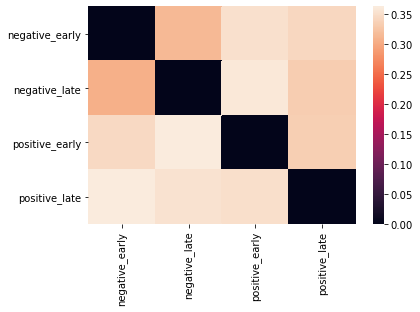

In [19]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pd.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

S:\Python-64\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


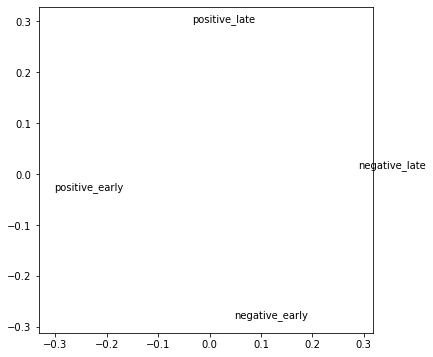

In [20]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

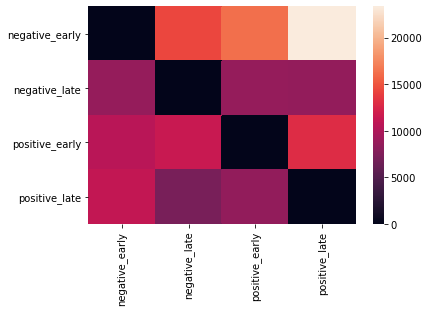

In [21]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pd.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

S:\Python-64\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


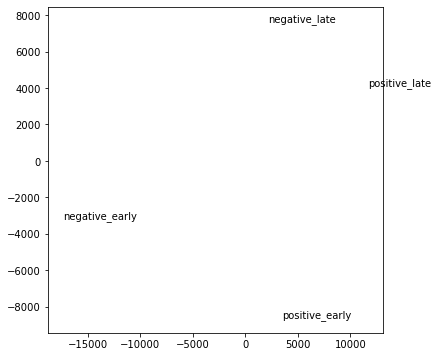

In [22]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

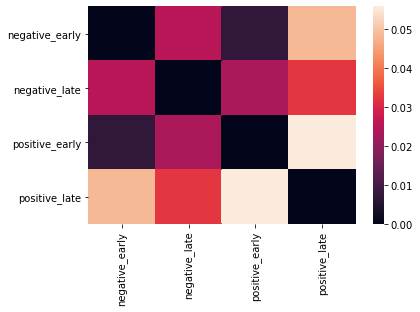

In [23]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pd.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

S:\Python-64\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


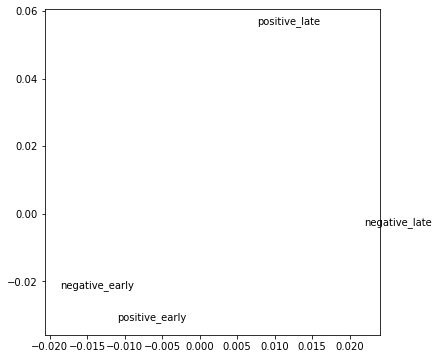

In [24]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

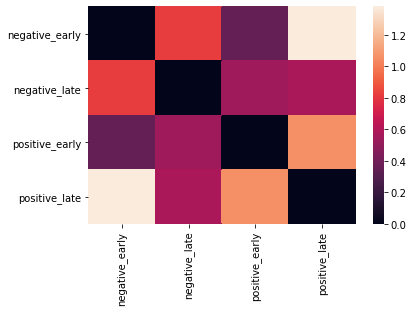

In [25]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pd.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

S:\Python-64\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


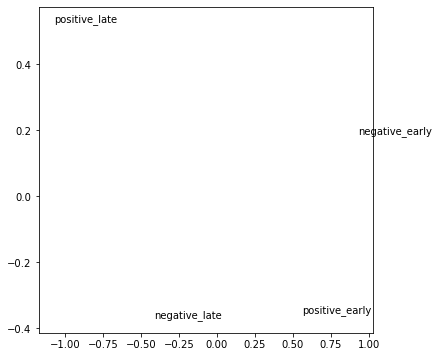

In [26]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

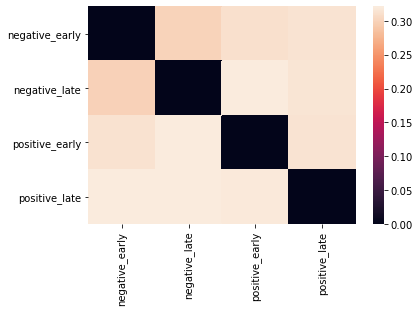

In [27]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference='JS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pd.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

S:\Python-64\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


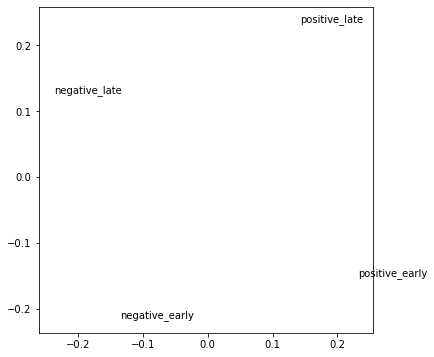

In [28]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

The above analyses reveal that the four corpora I collect are very different from each other, though some of them only differ in terms of their collection times. Thus, I conclude that the content of discussion on Reddit and people's popular preference may change over time. Among those analyses, the Wasserstein distance works best compared with other methods, because it not only reveals the large divergence between each corpus, but also shows the subtle differences between each pair of divergence. 
<p>JS divergence is the average KL divergence between each distribution and the average of both distributions. It is symmetric by contrast to KL divergence.